### Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv("mail_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
df.shape


(5572, 2)

In [40]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category'>

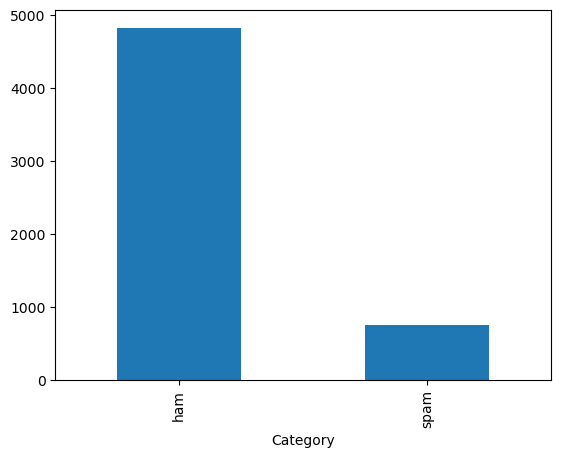

In [41]:
df.Category.value_counts().plot(kind='bar')

In [42]:
df[df.duplicated()]

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [43]:
df1=df.drop_duplicates()
df1.shape

(5157, 2)

### Convert spam=1,non spam=0

In [44]:
def spam_encode(x):
    if x=='spam':
        return 1
    else:
        return 0

In [45]:
df1['is_spam']=df1['Category'].apply(lambda x:spam_encode(x))
df1.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_11348\2708045434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['is_spam']=df1['Category'].apply(lambda x:spam_encode(x))


,Category,Message,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [46]:
df2=df1.drop('Category',axis=1)
df2.head()

,Message,is_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [47]:
df2['is_spam'].value_counts()

is_spam
0    4516
1     641
Name: count, dtype: int64

### Balance the data set

In [48]:
non_spam_df=df2[df2['is_spam']==0].sample(641)
non_spam_df.shape

(641, 2)

In [49]:
spam=df2[df2['is_spam']==1]
spam.shape

(641, 2)

#### Combine spam and non spam dataframe

In [50]:
balanced_df=pd.concat([non_spam_df,spam],axis=0)
balanced_df.head()

,Message,is_spam
5148,K..then come wenever u lik to come and also te...,0
1982,"Sorry, I'll call later in meeting any thing re...",0
5548,"No, I was trying it all weekend ;V",0
155,"You are everywhere dirt, on the floor, the win...",0
5474,Where's mummy's boy ? Is he being good or bad ...,0


In [51]:
balanced_df.shape

(1282, 2)

### Dependent and Independent variables

In [52]:
x=balanced_df['Message']
y=balanced_df['is_spam']

### Splitting data into training and testing

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

### Convert the text into numerical data

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector =CountVectorizer()
print(xtrain)
xtrain_count=count_vector.fit_transform(xtrain.values)
xtrain_count.toarray()

2034                              IM GONNA MISS U SO MUCH
591     For ur chance to win a £250 wkly shopping spre...
3508    Two fundamentals of cool life: "Walk, like you...
4643    You are being ripped off! Get your mobile cont...
4616    Sunshine Quiz! Win a super Sony DVD recorder i...
                              ...                        
3360    Sorry I missed your call let's talk when you h...
3801    We tried to contact you re your reply to our o...
4069    TBS/PERSOLVO. been chasing us since Sept for£3...
1625    500 free text msgs. Just text ok to 80488 and ...
4048    Thanks for your ringtone order, reference numb...
Name: Message, Length: 1025, dtype: object


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Model Development

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()

In [56]:
nb_model.fit(xtrain_count,ytrain)

MultinomialNB()

### Model prediction

In [57]:
emails=[
    'is there python class tommorrow',
    'Won lottery of $45000!!!']
emails_count_vect=count_vector.transform(emails)
nb_model.predict(emails_count_vect)

array([0, 1], dtype=int64)

In [58]:
xtest_count=count_vector.transform(xtest)
ypred=nb_model.predict(xtest_count)

In [59]:
ypred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

### Model Evaluation

In [60]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score
print("Accuracy:",accuracy_score(ytest,ypred))
print("Presicion:",precision_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy: 0.9455252918287937
Presicion: 0.9186991869918699
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       140
           1       0.92      0.97      0.94       117

    accuracy                           0.95       257
   macro avg       0.94      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257

